In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from tifffile import imread
import os

In [24]:
cd ..

/Users/greco/Desktop


In [18]:
def load_all_files_in_folder(folder_path):
    
    data = {}
    
    # List all files in the folder
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        
        # Check if it's a .npy file
        if filename.endswith('.npy'):
            # Load the .npy file
            data[filename] = np.load(file_path)
    
    return data


F11_3s.tif
F12_3s.tif
F13_3s.tif
F14_3s.tif
F2_3s.tif
F3_3s.tif
F4_3s.tif
F5_3s.tif
F6_3s.tif
F7_3s.tif
F9_3s.tif


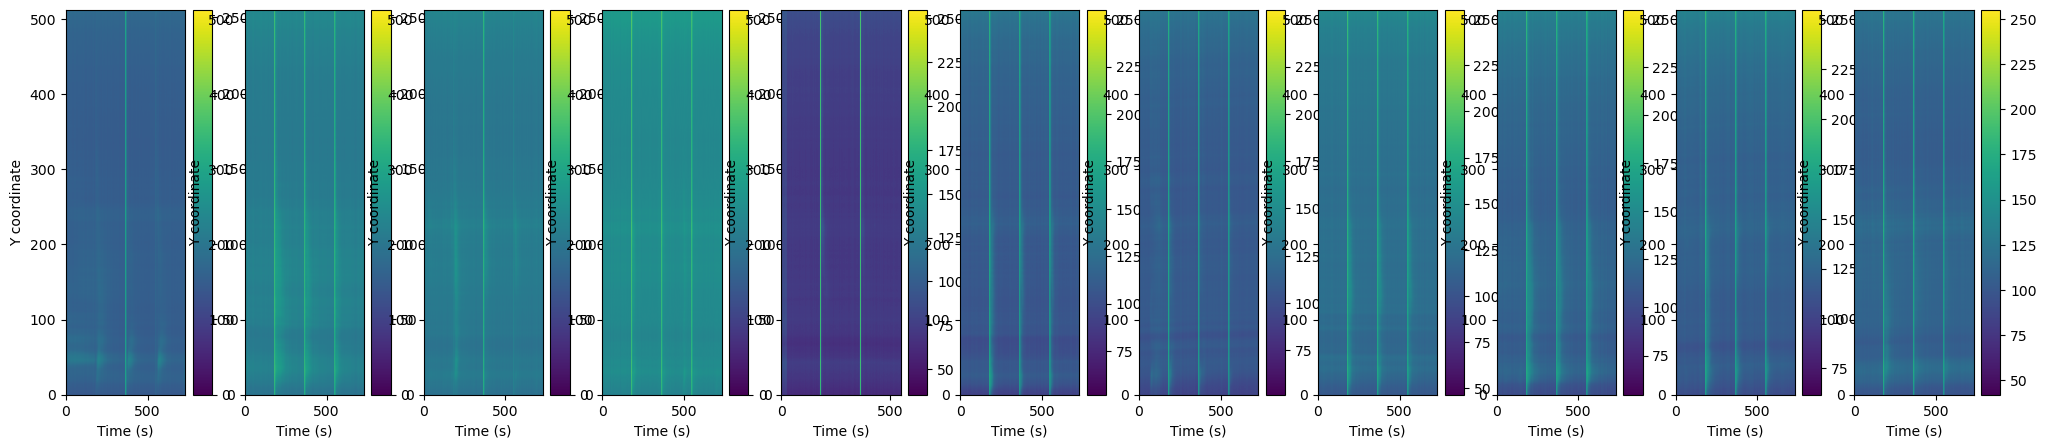

In [30]:
#Input and visualization of the data (x-averaged plots)

path = "glia_3sdata/opsin"
waves = np.sort(os.listdir(path))[1:]
len(waves)

WAVES = []
TIMES = []

plt.figure(figsize = (25, 5))
i=1

for filename in np.sort(os.listdir(path))[1:]:

    wave = imread(path + '/' + filename)

    #wave = (wave - np.mean(wave[0:800, :, :]))/np.mean(wave[0:800, :, :])

    times = np.linspace(0,len(wave[:,0,0])*0.2,len(wave[:,0,0])+1)
    times = times[:-1]
    TIMES.append(times)
    
    print(filename) 
    plt.subplot(1, len(waves), i)
    i = i+1
    plt.imshow(np.mean(wave, axis=2).T, aspect='auto', extent=[0, np.max(times), 0, 512])
    plt.colorbar()
    plt.xlabel("Time (s)")
    plt.ylabel("Y coordinate")
    WAVES.append(wave)

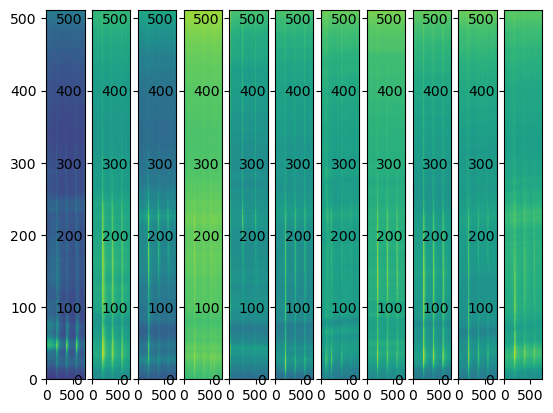

In [32]:
#Remove saturated frames
saturated_threshold = 255

# Process each TIFF file
for w in range(0, len(WAVES)):

    # Calculate the mean image
    mean_image = np.mean(WAVES[w][9:11,:,:], axis=0)

    for i in range(0, len(WAVES[w])):
        
        frame = WAVES[w][i,100:200,100:200]
        
        if np.all(frame == frame[0]):
            #print(w, ' -> ',i)
            WAVES[w][i,:,:] = mean_image

    plt.subplot(1, len(WAVES), w+1)
    plt.imshow(np.mean(WAVES[w], axis=2).T, aspect='auto', extent=[0, np.max(times), 0, 512])


fish:  1 / 11


/var/folders/1w/c82l1gs16tbfqhkg5hbpwkp00000gp/T/ipykernel_34928/2590183331.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tau1[i,j] = half_max_time_r[0] + half_max_time_l[0]
/var/folders/1w/c82l1gs16tbfqhkg5hbpwkp00000gp/T/ipykernel_34928/2590183331.py:52: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tau2[i,j] = half_max_time_r[0] + half_max_time_l[0]
/var/folders/1w/c82l1gs16tbfqhkg5hbpwkp00000gp/T/ipykernel_34928/2590183331.py:62: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Depr

fish:  2 / 11
fish:  3 / 11
fish:  4 / 11
fish:  5 / 11
fish:  6 / 11
fish:  7 / 11
fish:  8 / 11
fish:  9 / 11
fish:  10 / 11
fish:  11 / 11


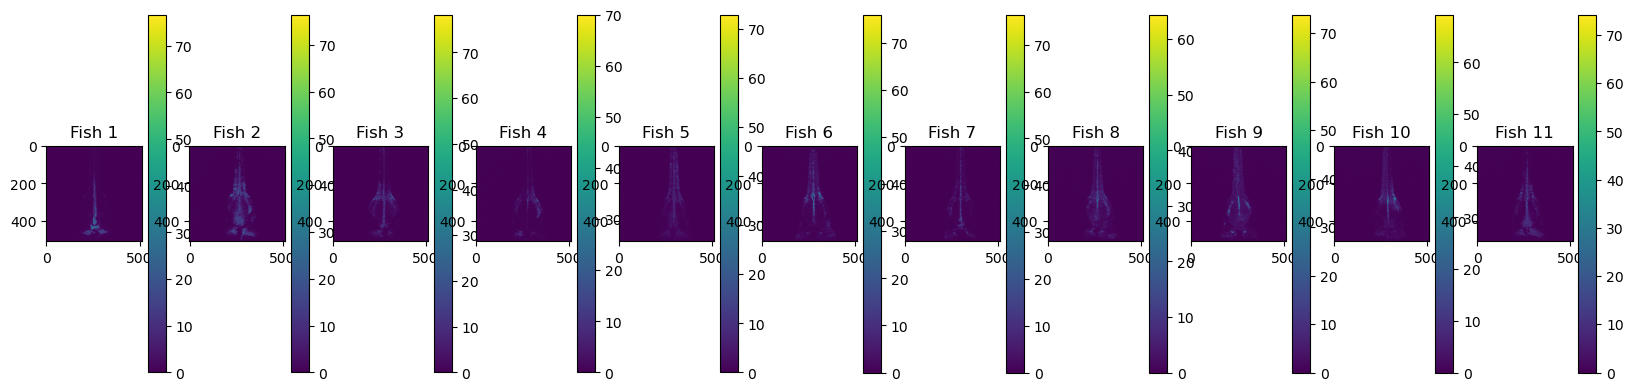

In [34]:
#Compute time scales maps
plt.figure(figsize=(20, 20))

#Define the lists for the time maps
T_1 = []
T_2 = []
T_3 = []

idxs = []
for w in range(0, len(WAVES)):

    #Temporary storage
    tau1 = np.zeros(np.shape(WAVES[w][0, :, :]))
    tau2 = np.zeros(np.shape(WAVES[w][0, :, :]))
    tau3 = np.zeros(np.shape(WAVES[w][0, :, :]))

    print(f"fish: ", w+1, f"/", len(WAVES))

    #Average value in time
    m1 = np.mean(WAVES[w][899:1300, :,:], axis = (1, 2))
    m2 = np.mean(WAVES[w][1812:2212, :,:], axis = (1, 2))
    m3 = np.mean(WAVES[w][2725:3125, :,:], axis = (1, 2))
    
    for i in range(0, len(WAVES[w][0, :, 0])):
        
        for j in range(0, len(WAVES[w][0, 0, :])):

            #For each pixel we consider 500 frames from the stimulus, (1st stimulus at 899, 2nd at 1812 and 3rd at 2725)
            y1 = WAVES[w][899:1300, i, j] - m1    #First wave 
            y2 = WAVES[w][1812:2212, i, j] - m2     #Second wave 
            y3 = WAVES[w][2725:3125, i, j] - m3     #Third wave 

            #Compute the point in which we have the maximum
            max_time1 = np.argmax(y1)
            
            #Compute the points in which the intensity is half that of the maximum on the right and on the left of the peak
            half_max_time_r = np.argwhere(y1[max_time1:] < y1[max_time1]/2)
            half_max_time_l = np.argwhere(y1[:max_time1] < y1[max_time1]/2)

            #Sum the two values to get width at hlaf max
            if(len(half_max_time_r) > 0 and len(half_max_time_l) > 0):
                tau1[i,j] = half_max_time_r[0] + half_max_time_l[0]
            else:
                tau1[i,j] = 0

            #Repeat for waves 2 and 3
            max_time2 = np.argmax(y2)
            half_max_time_r = np.argwhere(y2[max_time2:] < y2[max_time2]/2)
            half_max_time_l = np.argwhere(y2[:max_time2] < y2[max_time2]/2)

            if(len(half_max_time_r) > 0 and len(half_max_time_l) > 0):
                tau2[i,j] = half_max_time_r[0] + half_max_time_l[0]
            else:
                tau2[i,j] = 0
    
            max_time3 = np.argmax(y3)
            half_max_time_r = np.argwhere(y3[max_time3:] < y3[max_time3]/2)
            half_max_time_l = np.argwhere(y3[:max_time3] < y3[max_time3]/2)

            if(len(half_max_time_r) > 0 and len(half_max_time_l) > 0):
                tau3[i,j] = half_max_time_r[0] + half_max_time_l[0]
            else:
                tau3[i,j] = 0


    #Take away spurios values: negative times, times above 500 frames and then multiply by the correct time scale for 1 frame (0.2 s - 5Hz)
    
    tau1[tau1<0] = 0
    tau1[tau1>500] = 0
    tau1 = tau1*0.2
    
    tau2[tau2<0] = 0
    tau2[tau2>500] = 0
    tau2 = tau2*0.2
    
    tau3[tau3<0] = 0
    tau3[tau3>500] = 0
    tau3 = tau3*0.2

    
    T_1.append(tau1)
    T_2.append(tau2)
    T_3.append(tau3)

    plt.subplot(1, len(WAVES), w+1)
    plt.title("Fish " + str(w+1))
    plt.imshow(tau1)
    plt.colorbar()

Fraction of pixels above 30s:  0.002040863037109375


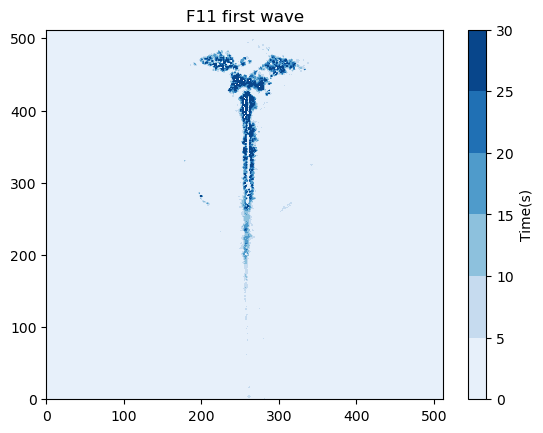

Fraction of pixels above 30s:  0.002044677734375


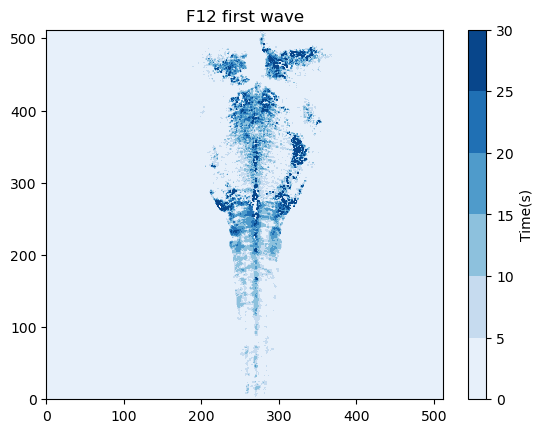

Fraction of pixels above 30s:  0.00144195556640625


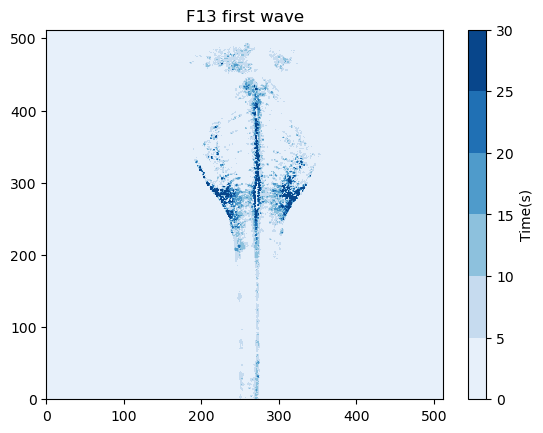

Fraction of pixels above 30s:  0.00026702880859375


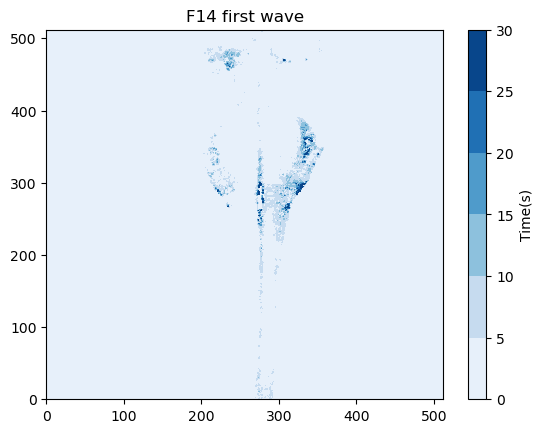

Fraction of pixels above 30s:  0.000209808349609375


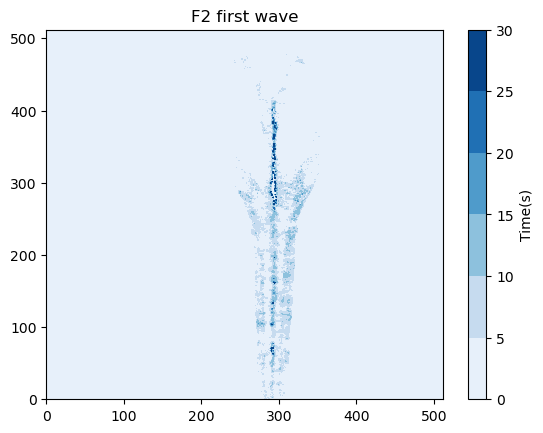

Fraction of pixels above 30s:  0.002346038818359375


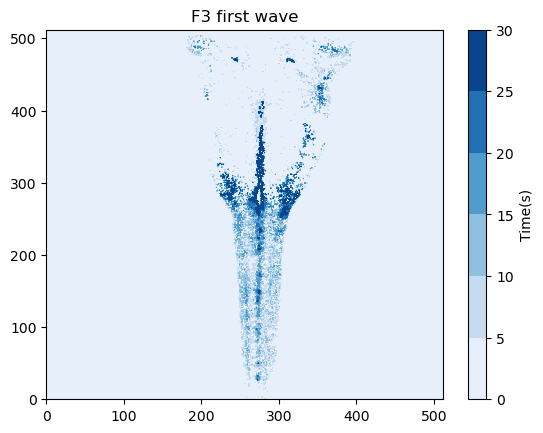

Fraction of pixels above 30s:  0.000919342041015625


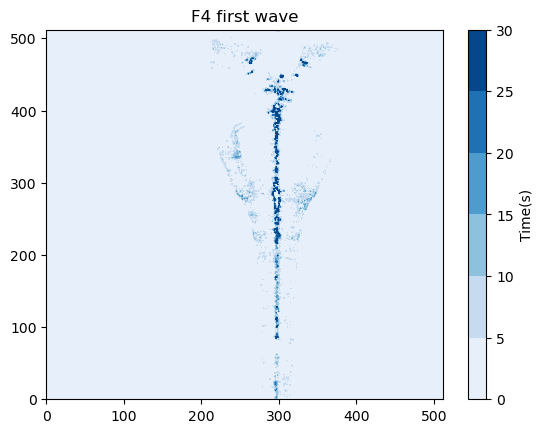

Fraction of pixels above 30s:  0.001316070556640625


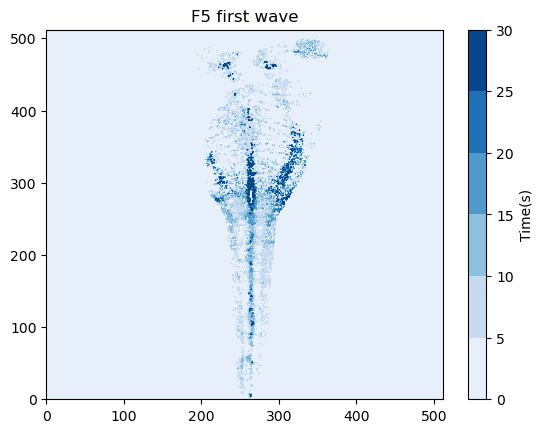

Fraction of pixels above 30s:  0.00315093994140625


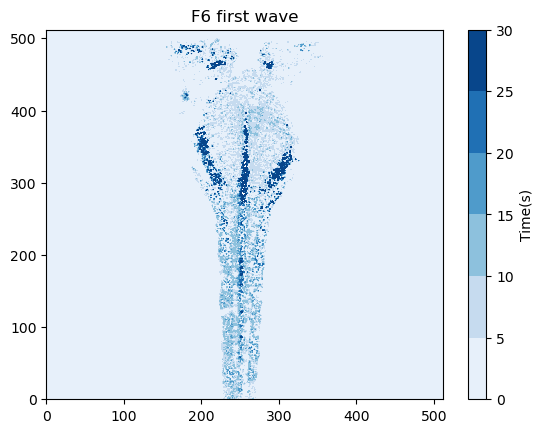

Fraction of pixels above 30s:  0.00167083740234375


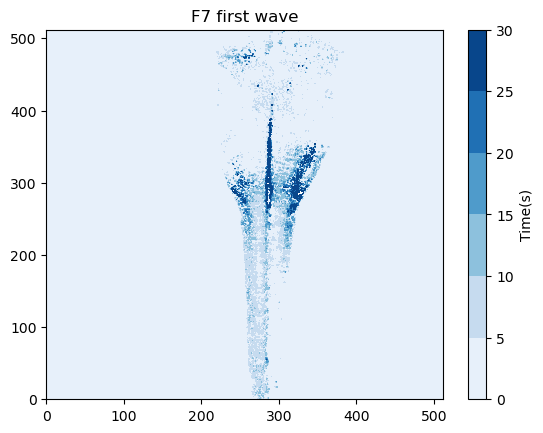

Fraction of pixels above 30s:  0.0006866455078125


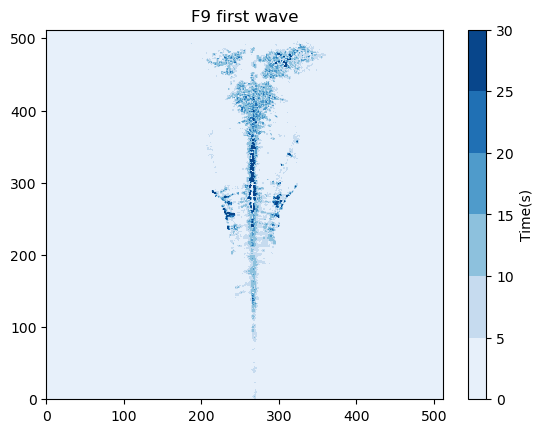

In [36]:
#Plot contour maps

x = np.linspace(0, 512, 512)
y = np.linspace(0, 512, 512)

X, Y = np.meshgrid(x, y)

for i in range(0, len(T_1)):

    Z = T_1[i]
    #Print this to see what is missing by introducing a cutoff in the plot
    print("Fraction of pixels above 30s: ", len(Z[Z>30])/(512**2))
    plt.title(waves[i][:-7] + ' first wave')
    #path = 'wave1/first_wave_contour' + waves[i][:-7] + '.svg'
    
    #plt.imshow(T_1[i], cmap = 'Blues', vmax = 40)
    plt.contourf(X, Y, Z, levels = [0, 5, 10, 15, 20, 25, 30], cmap='Blues', vmax = 30)
    plt.colorbar(label = 'Time(s)')
    
    #plt.savefig(path)
    plt.show()
    


In [38]:
#Alignment and average of the maps


final = T_1[0]
maxima = []


T_1 = np.array(T_1)

for i in range(0, len(T_1)):
    c = []
    
    for j in range(-100, 100):
        
        c.append(np.corrcoef(final.flatten(), np.roll(T_1[i,:,:], j).flatten())[0,1])

    c = np.array(c)
    max = np.argmax(c)
    print(max)
    maxima.append(max)
    
    final =final + np.roll(T_1[i,:,:], max-100)





100
96
89
84
69
86
63
97
107
75
95


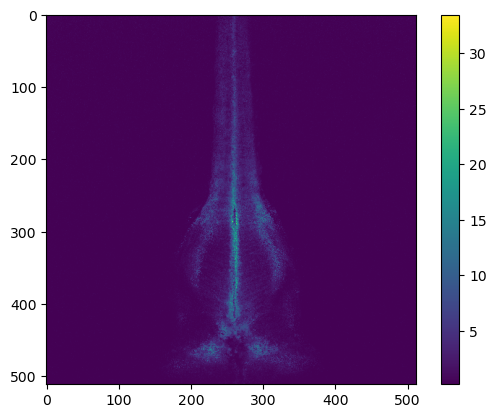

In [40]:
plt.imshow(final/len(T_1))
plt.colorbar()

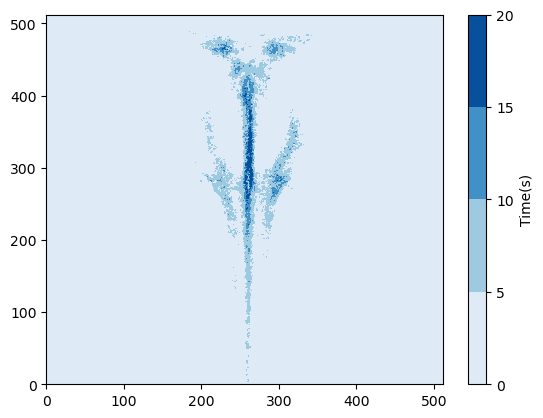

In [42]:
#plt.title(waves[i][:-7] + ' first wave')
path = 'wave1/first_wave_contour' + waves[i][:-7] + '.svg'

Z = final/len(T_1)
    #plt.imshow(T_1[i])
plt.contourf(X, Y, Z, levels = [0, 5, 10, 15, 20], cmap='Blues', vmax = 20)
plt.colorbar(label = 'Time(s)')
    
plt.savefig("FirstWaveAllFish.svg")
plt.show()